# 모델 성능 평가

## 분류 모델의 평가 지표
: 예측 대상이 범주형 데이터일 경우
* 정확도(Accuracy)
* 재현율(Recall)
* 정밀도(Precision)
* F1
* G measure
* ROC curve
* AUC

## 회귀 모델의 평가 지표
: 예측 대상이 수치 데이터인 경우
* MSE(Mean Square Erroe)
* RMSE(Root Mean Square Error)
* MAE(Mean Absolute Error)
* MAPE(Mean Absolute Percentage Error)
* $R^2$

## 정확도 문제 예
1. 타이타닉 생존자 예측
2. MNIST 데이터 세트

In [3]:
import numpy as np
from sklearn.base import BaseEstimator

#아무런 학습을 하지 않고 성별에 따라 생존자를 예측하는 단순한 Classifier 생성
#BestEstimator 상속 받음

class MyDummyClassifier(BaseEstimator):
    #fit() 메소드는 아무것도 학습하지 않음
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
                
        return pred

### MyDummyClassifier를 이용해 타이타닉 생존자 예측 수행

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

#Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

#머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df


#레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1] #첫문자만 추출
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

#앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [10]:
#타이타닉 생존자 예측
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할
titanic_df = pd.read_csv('train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)

#위에서 생성한 Dummy Classifier를 이용하여 학습/예측/평가 수행
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)
mypred = myclf.predict(X_test)
print(accuracy_score(y_test, mypred))

0.7877094972067039


# MNIST 데이터셋 활용하기

In [12]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [14]:
#digit 데이터 로드
digits = load_digits()
# digits

In [15]:
digits.data.shape

(1797, 64)

In [16]:
digits.target.shape

(1797,)

In [19]:
# 7인 데이터 확인
digits.target==7

array([False, False, False, ..., False, False, False])

In [20]:
#7인 데이터는 1 그 외는 0으로 변환
y = (digits.target==7).astype(int)

In [21]:
#학습/테스트 데이터 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [22]:
#불균형한 레이블 데이터 분포도 확인
pd.Series(y_test).value_counts()

0    405
1     45
dtype: int64

In [25]:
#DummyClassifier로 학습/예측/평가

fake_cl = MyFakeClassifier()
fake_cl.fit(X_train, y_train)
fakePred = fake_cl.predict(X_test)
accuracy = accuracy_score(y_test, fakePred)
accuracy

0.9

# Confusion Matrix 오차행렬

In [26]:
from sklearn.metrics import confusion_matrix
#MNIST의 fakepred
confusion_matrix(y_test, fakePred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

In [31]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
digits = load_digits()
y = (digits.target == 7).astype(int)

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)

In [29]:
fakepred.astype(int).sum()

0

In [30]:
#정밀도와 재현율 계산
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('정밀도 : ', precision_score(y_test, fakepred))
print('재현율 : ', recall_score(y_test, fakepred))

정밀도 :  0.0
재현율 :  0.0


C:\Users\Amps\anaconda3\envs\multi\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 오차행렬, 정확도, 정밀도, 재현율을 한꺼번에 계산하는 함수

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred) #오차행렬 
    accuracy = accuracy_score(y_test, pred) #정확도
    precision = precision_score(y_test, pred) #정밀도
    recall = recall_score(y_test, pred) #재현율
    
    print('오차행렬')
    print(confusion)
    print('정확도 : {0:.3f}, 정밀도 : {1:.3f}, 재현율 : {2:.3f}'.format(accuracy, precision, recall))

In [33]:
#전처리 함수
import pandas as pd
from sklearn.preprocessing import LabelEncoder

#Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

#머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df


#레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1] #첫문자만 추출
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

#앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [34]:
from sklearn.linear_model import LogisticRegression
#원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할
titanic_df = pd.read_csv('train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
get_clf_eval(y_test, lr_pred)

오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.849, 정밀도 : 0.774, 재현율 : 0.787


C:\Users\Amps\anaconda3\envs\multi\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## predict_proba()메소드

In [37]:
#예측 확률 반환
pred_proba = lr_clf.predict_proba(X_test)
pred_proba[:5]

array([[0.46175211, 0.53824789],
       [0.87863924, 0.12136076],
       [0.87717092, 0.12282908],
       [0.88269294, 0.11730706],
       [0.85528973, 0.14471027]])

In [40]:
#predict : 예측 결과 클래스 값 반환
pred = lr_clf.predict(X_test)
pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [43]:
#예측확률 array와 예측 결과값 array를 concatenate하여 예측확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)

print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측')
# print(pred_proba_result)

두개의 class 중에서 더 큰 확률을 클래스 값으로 예측


## Binarizer

In [44]:
from sklearn.preprocessing import Binarizer

X = [[1, -1, 2],
     [2, 0, 0],
     [0, 1.1, 1.2]]

#threshold 기준값도다 같거나 작으면 0을 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [45]:
### 분류 결정 임계값 0.5 기반에서 Binarizer를 이용하여 예측값 변환

In [46]:
#Binarizer의 threshold 설정값, 분류 결정 임계값 = 0.5로 설정
c_threshold = 0.5

#precidt_proba() 반환값([0확률 1확률])의 두번째 컬럼, 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

bina = Binarizer(threshold=c_threshold).fit(pred_proba_1)
custom_predict = bina.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.849, 정밀도 : 0.774, 재현율 : 0.787


In [ ]:
### 분류 결정 임계값 0.4 기반에서 Binarizer를 이용하여 예측값 변환

In [47]:
#Binarizer의 threshold 설정값, 분류 결정 임계값 = 0.5로 설정
c_threshold = 0.4

#precidt_proba() 반환값([0확률 1확률])의 두번째 컬럼, 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

bina = Binarizer(threshold=c_threshold).fit(pred_proba_1)
custom_predict = bina.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[98 20]
 [10 51]]
정확도 : 0.832, 정밀도 : 0.718, 재현율 : 0.836


In [48]:
### 분류 결정 임계값을 리스트에 저장해서 Binarizer를 이용하여 예측값 변환

In [50]:
#Binarizer의 threshold 설정값, 분류 결정 임계값 = 0.5로 설정
c_threshold = [0.40, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold():
#precidt_proba() 반환값([0확률 1확률])의 두번째 컬럼, 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

bina = Binarizer(threshold=c_threshold).fit(pred_proba_1)
custom_predict = bina.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

IndexError: boolean index did not match indexed array along dimension 1; dimension is 1 but corresponding boolean dimension is 5

In [53]:
from sklearn.metrics import precision_recall_curve

#레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

#실제값 데이터셋과 레이블값이 1일떄의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('임계값 shape : ', thresholds.shape)
print('정밀도 shape : ', precisions.shape)
print('재현율 shape : ', recalls.shape)

print('임계값 sample : ', thresholds[:5])
print('정밀도 sample : ', precisions[:5])
print('재현율 sample : ', recalls[:5])

임계값 shape :  (143,)
정밀도 shape :  (144,)
재현율 shape :  (144,)
임계값 sample :  [0.10394781 0.10395007 0.10397544 0.10773598 0.10892335]
정밀도 sample :  [0.38853503 0.38461538 0.38709677 0.38961039 0.38562092]
재현율 sample :  [1.         0.98360656 0.98360656 0.98360656 0.96721311]


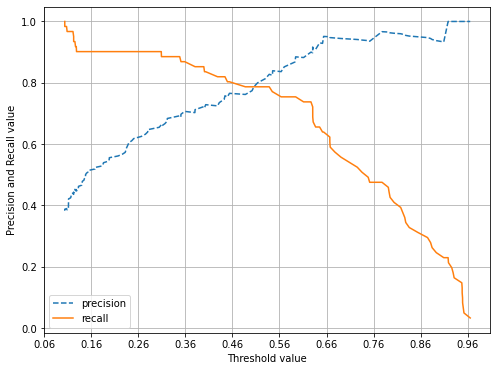

In [56]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0] #(143,)에서 143 추출
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

# 타이타닉 생존자 예측에서 F1 스코어

In [64]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred) #오차행렬 
    accuracy = accuracy_score(y_test, pred) #정확도
    precision = precision_score(y_test, pred) #정밀도
    recall = recall_score(y_test, pred) #재현율
    #F1 스코어 추가
    f1 = f1_score(y_test, pred)
    
    print('오차행렬')
    print(confusion)
    #F1 score print 추가
    print('정확도 : {0:.3f}, 정밀도 : {1:.3f}, 재현율 : {2:.3f}, F1 : {3:.3f}'.format(accuracy, precision, recall, f1))

In [66]:
#임계값 0.4~0.6 별로 정확도, 정밀도, 재현율, F1 스코어 확인
threshold = [0.40, 0.45, 0.50, 0.55, 0.60]

pred_proba = lr_clf.predict_proba(X_test)
get_clf_eval(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

TypeError: get_clf_eval() takes 2 positional arguments but 3 were given

# G measure

## ROC Curve와 AUC

In [68]:
from sklearn.metrics import roc_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

#thresholds[0]은 max(예측확률)+1로 임의 설정되는데 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임계값 배열의 index : ', thr_index)
print('샘플용 임계값 : ', np.round(thresholds[thr_index], 2))

#5step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임계값별 FPR : ', np.round(fprs[thr_index], 3))
print('샘플 임계값별 TPR : ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임계값 배열의 index :  [ 1  6 11 16 21 26 31 36 41 46 51]
샘플용 임계값 :  [0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
샘플 임계값별 FPR :  [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
샘플 임계값별 TPR :  [0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]
